In [84]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Q1)

### (i)

In [2]:
np.random.randint(-10,11,size=(1,100))

array([[ -6,  -3,   9,   5,   6, -10,   1,   8,  -6,  -6,  -4,   5,   6,
         -5,   7,   4,   2,  -9,  -1,  -1,   6,   5,   0,   6,  -2,   9,
         -1,   7,   6, -10,   3,   5,   3,  -6,   6,   5,  -9,  -6,  -8,
         -3,   3,  -5,   7,   5,  -2,  -3,  -9, -10,   7,   2,   9,   3,
          8,  -2,  -9,   5,   0,  -1,  -1,  -6,  -1,  -7,   2,   9, -10,
         -9,   7,  -6,   2,   1,  -2,   3,  -4, -10,  10,   6,  -2,   1,
         -3,   9,  -3,  -1,  -7,  -7,   6,   2,  -8,  -9,  10,   7,   7,
          8,   1,  -4,   4,  -3,  -8,  -1,   6,   1]])

### (ii)

In [3]:
np.random.rand(1,100)

array([[0.78799014, 0.34354758, 0.48272461, 0.28921437, 0.43824854,
        0.2227885 , 0.17676113, 0.35956974, 0.0905674 , 0.5554027 ,
        0.87818587, 0.63437773, 0.92091153, 0.99484265, 0.7316984 ,
        0.2313137 , 0.82963136, 0.76836449, 0.10710166, 0.75210176,
        0.07502932, 0.62564485, 0.0017943 , 0.2349269 , 0.77192949,
        0.39200792, 0.85561868, 0.08887572, 0.88646654, 0.3147526 ,
        0.72125708, 0.49506797, 0.06712348, 0.42853072, 0.48764096,
        0.60464411, 0.1070305 , 0.4969209 , 0.28558413, 0.12185908,
        0.12695041, 0.29668368, 0.05599773, 0.89563726, 0.80101003,
        0.44914879, 0.10055951, 0.74855516, 0.69911523, 0.84958656,
        0.56781569, 0.82741358, 0.16516082, 0.77994873, 0.65774645,
        0.04078946, 0.95260367, 0.71224744, 0.44972598, 0.37985349,
        0.51580282, 0.66012464, 0.22899039, 0.29909126, 0.35752904,
        0.88359226, 0.9663318 , 0.37420373, 0.07437195, 0.61512922,
        0.38336165, 0.35422734, 0.50444016, 0.49

##Q2)

###a)

In [4]:
def func(n):
    return (np.random.uniform(low=-1, high=1, size=(n,2)))

In [5]:
func(4)

array([[ 0.96644975,  0.54523546],
       [ 0.84246504,  0.44839961],
       [ 0.36461881, -0.79022747],
       [ 0.44090101,  0.90278347]])

###b)

In [6]:
n = int(input())
x_new,y_new = map(float,input().split())
point_data = func(n)

100
0.2 -0.1


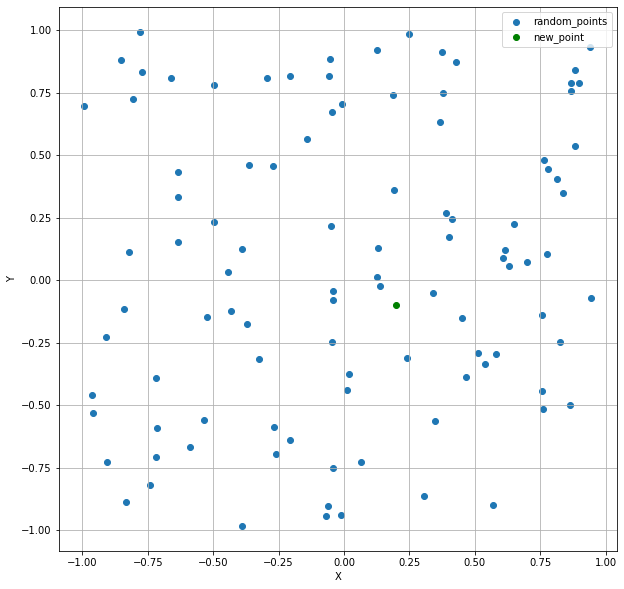

In [33]:
plt.figure(figsize=(10,10))
plt.scatter(point_data[:,0],point_data[:,1],label='random_points')
plt.scatter(x_new,y_new,c='g',label='new_point')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

In [8]:
def k_nearest(x_new,y_new,k,points):
  new_point = np.array([x_new,y_new])                                           
  distance = np.linalg.norm(points - new_point,axis=1)                          #euclidean distance
  dis = []
  k_near = []
  for i in range(distance.shape[0]):
    dis.append((distance[i],i+1))
  dis.sort()
  for i in range(k):
    k_near.append([points[dis[i][1]-1,0],points[dis[i][1]-1,1]])
  return np.array(k_near)

In [9]:
k = 5
k_nearest(x_new,y_new,k,point_data)

array([[ 0.13813846, -0.02293195],
       [ 0.12451033,  0.01421486],
       [ 0.33978803, -0.0507895 ],
       [ 0.23991313, -0.31072767],
       [ 0.12956189,  0.12825015]])

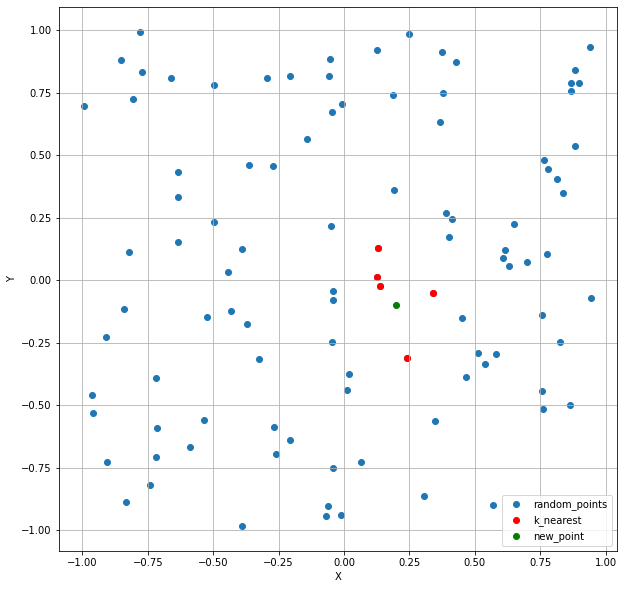

In [24]:
knn = k_nearest(x_new,y_new,k,point_data) 
plt.figure(figsize=(10,10))
plt.scatter(point_data[:,0],point_data[:,1],label='random_points')
plt.scatter(knn[:,0],knn[:,1],c='r',label='k_nearest')
plt.scatter(x_new,y_new,c='g',label='new_point')
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

###c)

In [25]:
def get_angle(x,y):
  return((np.arctan2(y,x)*180/np.pi) if (np.arctan2(y,x)*180/np.pi>=0) else (np.arctan2(y,x)*180/np.pi+360))
print(get_angle(10,-1))

354.28940686250036


In [79]:
def pos_angle(x_new,y_new,k,points):
  knn = k_nearest(x_new,y_new,k,points)
  new_point_angle = get_angle(x_new,y_new)
  ang_kpoints = np.array([get_angle(x,y) for [x,y] in knn])
  knn_pos = []
  ang_range = [new_point_angle%360,(new_point_angle+180)%360]
  for i in range(k):
    if((ang_kpoints[i]>=ang_range[0] and ang_kpoints[i]<=ang_range[1] and new_point_angle<180) or ( (ang_kpoints[i]>=ang_range[0] or ang_kpoints[i]<=ang_range[1]) and new_point_angle>=180)):
      knn_pos.append([knn[i,0],knn[i,1]])
  return np.array(knn_pos)

#### Points from K nearest that make positive angle with the new point

In [80]:
[get_angle(x,y) for [x,y] in knn]

[350.57445822826753,
 6.513036958369947,
 351.4987069121112,
 307.6717644405481,
 44.708484483217525]

In [81]:
 new_point_angle = get_angle(x_new,y_new)
 [new_point_angle%360,(new_point_angle+180)%360]

[333.434948822922, 153.43494882292202]

In [82]:
pos_angle(x_new,y_new,k,point_data)

array([[ 0.13813846, -0.02293195],
       [ 0.12451033,  0.01421486],
       [ 0.33978803, -0.0507895 ],
       [ 0.12956189,  0.12825015]])

## Q3)

### a)

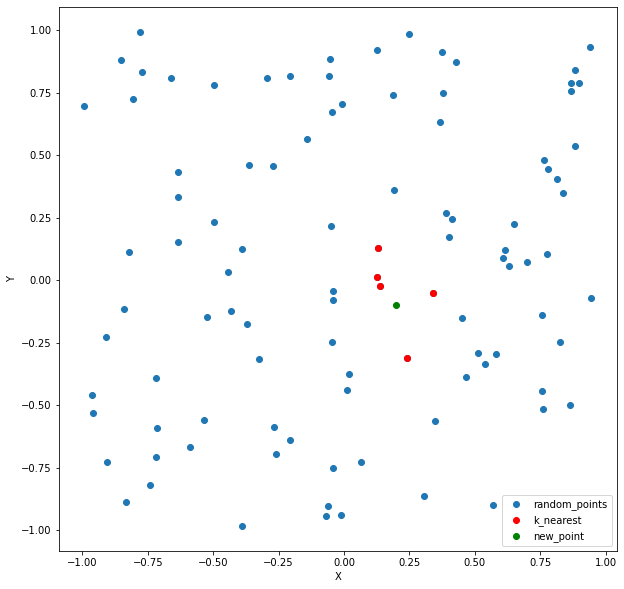

In [78]:
knn = k_nearest(x_new,y_new,k,point_data) 
plt.figure(figsize=(10,10))
plt.scatter(point_data[:,0],point_data[:,1],label='random_points')
plt.scatter(knn[:,0],knn[:,1],c='r',label='k_nearest')
plt.scatter(x_new,y_new,c='g',label='new_point')
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

###b)

In [42]:
hist_data = np.random.randint(-10,11,size=(100))
print(hist_data)

[ -2   2  -8   5  -4   3  -5  -1   6   7 -10  -5  -9   9 -10   4   7  -8
   1  -8   7   0   5  10  -3  -1  -5  -9  -8  -2  -4 -10   9  10  -9   9
   0   1 -10   5  -2   8   6   8   5   8  -8   8  -2  -8   5  -3   6   4
   3 -10   2  -7  10   6  -5  -7  -2  -7   3   6 -10  -2  -7  -4  -1  -6
 -10   5  -9  -3  -8   2  10  -7  -9   7   2   0   9  -6 -10   1  -1   5
  -8  -6  -6  -7   6  -2   9   8  -7   9]


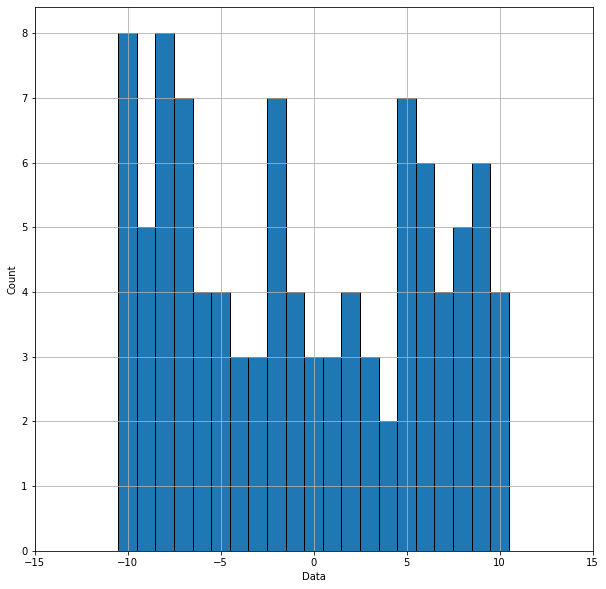

In [43]:
plt.figure(figsize=(10,10))
plt.grid(True)
plt.hist(hist_data,bins = [i+0.5 for i in range(-11,12)],density=0,ec='black')
plt.xlim(-15,15)
plt.ylabel('Count')
plt.xlabel('Data');
plt.show()

##Q4)

In [68]:
dat = np.random.uniform(-0.5,0.5,(100))

In [69]:
cur = 0
sample_mean_points = []
for i in range(100):
  cur += dat[i]
  sample_mean_points.append([i+1,cur/(i+1)])

In [70]:
smp = np.array(sample_mean_points)

$f_1 = \sqrt\frac{1}{k} $ \
$f_2 = -\sqrt\frac{1}{k} $

In [71]:
def f1(x):
  return (math.sqrt(1/x))
def f2(x):
  return (-math.sqrt(1/x))

In [72]:
x = np.linspace(1,100,10000)

In [73]:
y1 = [f1(xx) for xx in x]
y2 = [f2(xx) for xx in x]

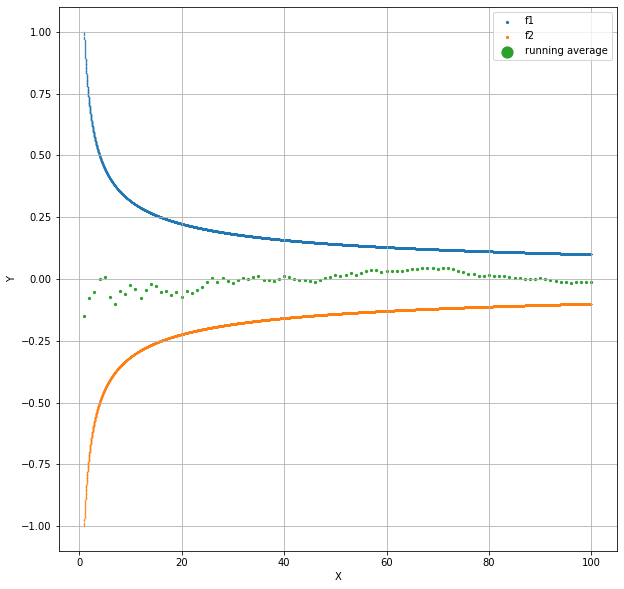

In [99]:
plt.figure(figsize=(10,10))
plt.grid(True)
plt.scatter(x,y1,s=0.2,label = 'f1')
plt.scatter(x,y2,s=0.2,label = 'f2')
plt.scatter(smp[:,0],smp[:,1],s=5,label = 'running average')
plt.legend(markerscale=5)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()